In [1]:
import A_GIS

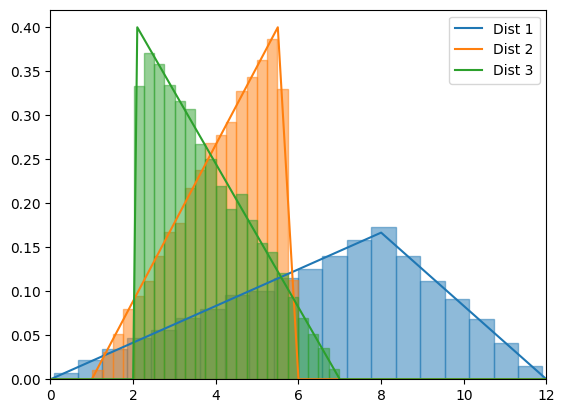

In [2]:
# Construct marginal distributions.
t1=A_GIS.Math.Statistics.Distribution.init(type="triangular",low=0,mode=8,high=12)
t2=A_GIS.Math.Statistics.Distribution.init(type="triangular",low=1,mode=5.5,high=6)
t3=A_GIS.Math.Statistics.Distribution.init(type="triangular",low=2,mode=2.1,high=7)
m = [t1,t2,t3]

# Construct correlation matrix.
c = A_GIS.Math.Statistics.CorrelationMatrix.new(size=3,values=[0.1,-0.1,0.1])

# Get realizations.
nr=10000
r = A_GIS.Math.Statistics.Distribution.sample(marginals=m,correlation=c,size=nr)

# Plot realizations.
ax = A_GIS.Math.Statistics.Distribution.plot(distributions=m,realizations=r)

In [3]:
import numpy
cs=A_GIS.Math.Statistics.CorrelationMatrix.from_samples(realizations=r)
print('original:',numpy.round(c.values,2))
print('sampled:',numpy.round(cs.values,2))

original: [ 0.1 -0.1  0.1]
sampled: [ 0.11 -0.07  0.11]


variances [6.2846292  1.24240352 1.37903126]
ck [0.8, 0.8, 0.8]
weights [0.10367119 0.44890305 0.44742576]


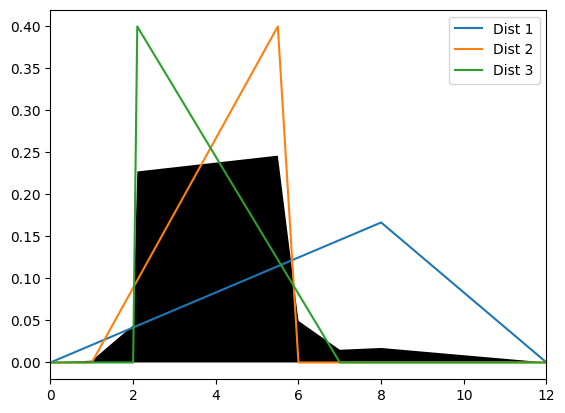

In [4]:
v = numpy.var(r,axis=0)
ck = [0.8,0.8,0.8]
weights = A_GIS.Math.Statistics.Distribution.Mixture.Weights.get(correlation_matrix=c,variances=v,multipliers=ck)
print("variances",v)
print("ck",ck)
print("weights",weights)
x,y = A_GIS.Math.Statistics.Distribution.Mixture.get(distributions=m,weights=weights,bins=1000)

import matplotlib.pyplot as plt
ax = A_GIS.Math.Statistics.Distribution.plot(distributions=m)
ax.fill(x,y,'k')
plt.show()